# プログラミングのない世界 (4)

## 手書き文字認識

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [21]:
digits.images.shape

(1797, 8, 8)

In [22]:
digits.images[3]

array([[ 0.,  0.,  7., 15., 13.,  1.,  0.,  0.],
       [ 0.,  8., 13.,  6., 15.,  4.,  0.,  0.],
       [ 0.,  2.,  1., 13., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 15., 11.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 12., 12.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1., 10.,  8.,  0.],
       [ 0.,  0.,  8.,  4.,  5., 14.,  9.,  0.],
       [ 0.,  0.,  7., 13., 13.,  9.,  0.,  0.]])

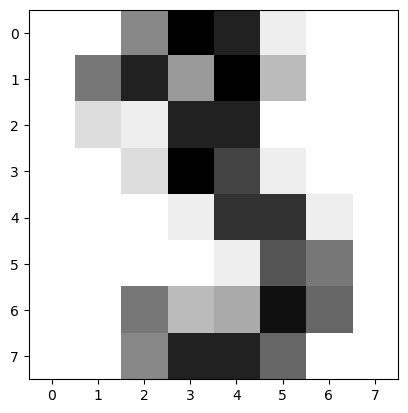

In [23]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(digits.images[3], cmap=plt.cm.gray_r)
plt.show()

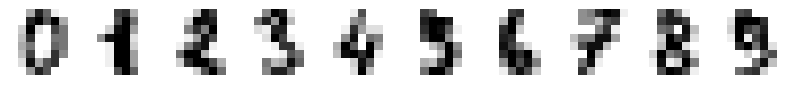

In [24]:
_, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    #ax.set_title("Training: %i" % label)

より大きなデータセットを使う

In [25]:
from sklearn.datasets import fetch_openml

In [26]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [27]:
X.shape, y.shape

((70000, 784), (70000,))

In [28]:
np.sqrt(784)

28.0

In [29]:
X[3].reshape((28,28))

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

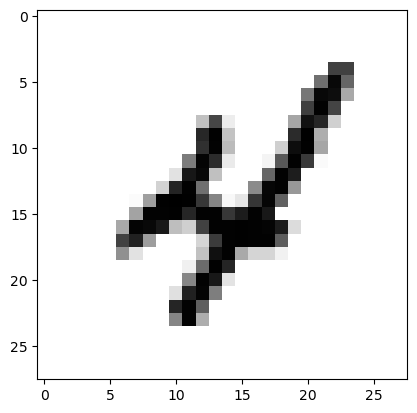

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X[9].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

In [31]:
y[9]

'4'

In [32]:
X = X / 255.0

In [33]:
X[3].reshape((28,28))

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

訓練 (train) 用と評価 (test) 用のデータセットに分割する:

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

In [35]:
list(map(np.shape,(X_train,X_test,y_train,y_test)))

[(21000, 784), (49000, 784), (21000,), (49000,)]

In [36]:
mlp = MLPClassifier(
    hidden_layer_sizes=(40,),
    max_iter=8,
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)

In [37]:
import warnings
from sklearn.exceptions import ConvergenceWarning

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

Iteration 1, loss = 0.44139186
Iteration 2, loss = 0.19174891
Iteration 3, loss = 0.13983521
Iteration 4, loss = 0.11378556
Iteration 5, loss = 0.09443967
Iteration 6, loss = 0.07846529
Iteration 7, loss = 0.06506307
Iteration 8, loss = 0.05534985


In [38]:
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

Training set score: 0.986429
Test set score: 0.953061


In [39]:
mlp.predict([X_test[9]]), y_test[9]

(array(['7'], dtype='<U1'), '7')

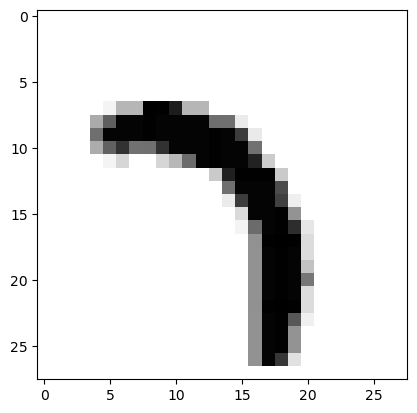

In [40]:
fig = plt.figure()
ax = fig.add_subplot()
ax.imshow(X_test[9].reshape((28,28)), cmap=plt.cm.gray_r)
plt.show()

機械学習の結果、各層には次に可視化するような重みが掛かるようになっている:

In [41]:
mlp.coefs_[0].shape

(784, 40)

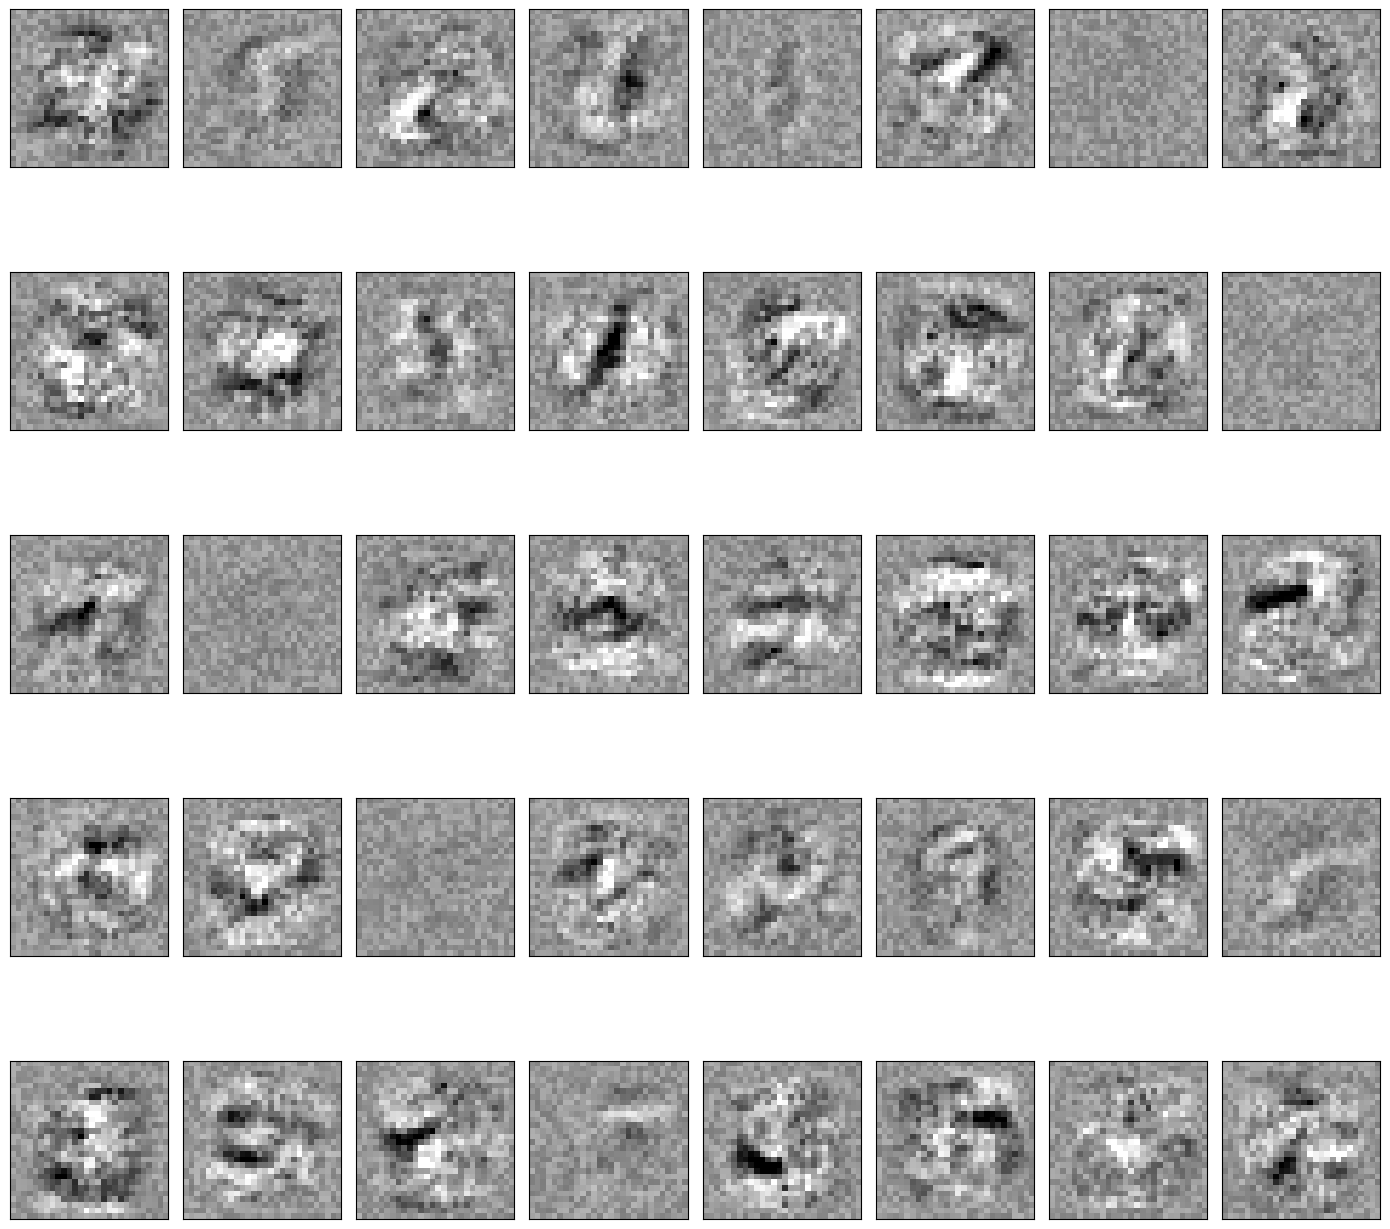

In [42]:
fig, axes = plt.subplots(5, 8, figsize=(14,14))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_aspect('equal')

plt.tight_layout()
#plt.subplots_adjust(hspace=None)
plt.show()

```{seealso}
* [Visualization of MLP weights on MNIST — scikit-learn 1.5.1 documentation](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html)
```